In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.853660110574
[[ 163.51590165   88.5328519     0.            0.          234.0661994
   -78.45866414    0.56557349    0.            7.10043209  -13.93912168]]
Training MSE: 12291.977
Test MSE: 27166.385


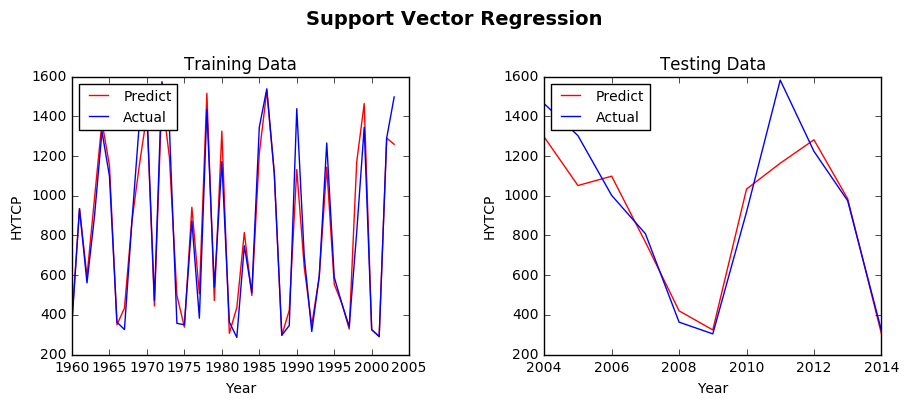

In [39]:
# Read data
data = pd.read_csv("AK.csv")
year1 = data[['Year']][:44]
year2 = data[['Year']][44:55]

# Data Preprocessing
data['GDP_scaled']=preprocessing.scale(data['GDP'])
data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
data['PCP_scaled']=preprocessing.scale(data['PCP'])
data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

# Split data for train and test
all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
all_y = data[['HYTCP']][:55]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

# SVR for hydro in CA
clf = SVR(kernel='linear', C=1000.0, epsilon=0.3).fit(X_train, y_train)

print(clf.score(X_test, y_test))
print(clf.coef_)

train_error = mean_squared_error(y_train, clf.predict(X_train))
print('Training MSE: %.3f' % train_error)
test_error = mean_squared_error(y_test, clf.predict(X_test))
print('Test MSE: %.3f' % test_error)


# Plots
fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Support Vector Regression', fontsize=14, fontweight='bold')

# Plot for training data
fig.add_subplot(121)
plt.plot(year1, clf.predict(X_train), color='red', label='Predict')
plt.plot(year1, y_train, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Training Data')
plt.xlabel('Year')
plt.ylabel('HYTCP')

# Plot for test data
fig.add_subplot(122)
plt.plot(year2, clf.predict(X_test), color='red', label='Predict')
plt.plot(year2, y_test, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Testing Data')
plt.xlabel('Year')
plt.ylabel('HYTCP')

plt.tight_layout(pad=4, w_pad=4)
plt.show()

In [35]:
# predict Hydro for future
year3 = data[['Year']][-6:]
year3 = year3.set_index([[0, 1, 2, 3, 4, 5]])
future_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled','OP2_scaled']][-6:]
pred = pd.DataFrame(clf.predict(future_x))
pred.columns = ['Hydro']
future = pd.concat([year3, pred], axis=1)
print(future)

     Year         Hydro
0  2015.0  24383.096186
1  2016.0  33816.927829
2  2017.0  32935.945961
3  2018.0  31605.241010
4  2019.0  30419.757548
5  2020.0  29421.798080


In [42]:
result = year3
scores = []

for i in range(49):
    data = pd.read_csv('%s.csv' % (statelist[i]))
    
    year1 = data[['Year']][:44]
    year2 = data[['Year']][44:55]

    # Data Preprocessing
    data['GDP_scaled']=preprocessing.scale(data['GDP'])
    data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
    data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
    data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
    data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
    data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
    data['PCP_scaled']=preprocessing.scale(data['PCP'])
    data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
    data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
    data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

    # Split data for train and test
    all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
    all_y = data[['HYTCP']][:55]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

    # SVR for hydro in CA
    clf = SVR(kernel='linear', C=100.0, epsilon=0.3).fit(X_train, y_train)
    print(clf.score(X_test, y_test))

    # predict Hydro for future
    #year3 = data[['Year']][-6:]
    #year3 = year3.set_index([[0, 1, 2, 3, 4, 5]])
    future_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled','OP2_scaled']][-6:]
    pred = pd.DataFrame(clf.predict(future_x))
    pred.columns = [statelist[i]]
    result = pd.concat([result, pred], axis=1)

print(result)

# output to csv
result.to_csv('HydroPreds.csv', encoding='utf-8', index=False)

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.853605262638
0.718404286088
0.531273631717
0.201237299857
0.146613811105
0.013444381266
0.824338271927
1.0
0.375019818923
0.225524240936
-0.0324028904248
0.0382592371065
0.797844941262
0.850558766313
0.482036352483
0.206475340308
0.539026330035
0.244620136611
0.685113161446
0.726662505135
0.308006876918
0.815913602389
0.524709376184
1.0
0.28102931568
0.578660745208
-0.216473943052
0.0204955730968
0.56345438291
0.0259911453514
0.608843358165
-0.0457738899712
0.411614603362


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


0.838401275926
0.695810111132
0.142517322161
0.575772759274
0.0313889075692
0.70069552511
-0.413654884401
0.553099322973
0.726859828595
0.358207694064
0.409491271041
0.851041889523
0.113683661226
0.73067470563
0.494135280372
0.242747015683
     Year           AK            AL           AR           AZ            CA  \
0  2015.0  1446.314202  10188.237236  4394.852211  6193.485794  27395.757696   
1  2016.0  1493.645444   7193.982942  3329.293522  6044.220903  32789.962526   
2  2017.0  1528.201495   9174.841314  3172.481374  5931.499352  31586.084250   
3  2018.0  1564.872871   9453.647954  3073.834336  5920.576016  30752.779947   
4  2019.0  1599.111114   9679.730102  2918.998320  5676.780782  30135.493707   
5  2020.0  1634.088810   9359.115471  3015.905899  5551.134738  29651.534406   

            CO          CT   DE          FL     ...               SD  \
0  1360.065866  307.169039  0.0  167.050872     ...      5284.658535   
1  1257.169278  306.871554  0.0  176.571572     ...    